In [1]:
#!/usr/bin/env python
# coding: utf-8

# ==================================================================== #
# author: Yung-Hsin Chen                                               #
# copyright: Copyright 2019, Thermal and Statistical Physics Project   #
# credit: Mei-Yan Sam, Sing-Hong Chen                                  #                                              
# ==================================================================== #

# import modules
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

Measure the correlation function matrix 
$$
  C(\vec{r}) = \langle S_{0,0} S_{i,j} \rangle,
$$ 
where $\vec{r}=(i,j)$ and $i,j=1,\cdots, L$.

Define the Fourier transform of the correlaction function 
$$
  S(\vec{q})=\sum_{\vec{r}} \cos(\vec{q}\cdot\vec{r}) C(\vec{r}).
$$
Define correlation length $\xi_a$ as 
$$
  \xi_a = \frac{1}{q_1} \sqrt{\frac{S(0)}{S(q_1)}-1},
$$ where $q_1=(\frac{2\pi}{L},0)$.

Plot $\xi_a/L$ as a function of $T$ for $L=4,8,16$ and show that the curves corss around exact $T_c$.

In [2]:
def dE(s, L, i, j):
    NB = s[(i+1)%L,j]+s[i,(j+1)%L]+s[(i-1)%L,j]+s[i,(j-1)%L]
    dE = 2 * s[i,j] * NB
    return dE

# Fourier trans. of correlation function
def S(C, q_x, q_y, L):
    s = 0.0
    for i in range(L):
        for j in range(L):
            s += math.cos(q_x*i+q_y*j)*C[i][j]
    return s

# Correlation length
def Xi_a(C, L):
    xi_a = 1 / (2*np.pi / L) * ( S(C, 0, 0, L) / S(C, 2*math.pi/L, 0, L) - 1 )**(1/2)
    return xi_a

# output a spin configuration
def Monte_Carlo_Spin(T, L, N_MC, spins):
    K = 1
    beta = 1.0/(K*T)
    C = np.zeros((L, L), dtype = np.float)
    for n in range(N_MC):
        for update in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                spins[i,j] = -spins[i,j]
        for i in range(L):
            for j in range(L):
                C[i][j] += spins[0][0] * spins[i][j]
    C = C / N_MC
    xi_a = Xi_a(C, L)
    return xi_a

## $\frac{\xi_a}{\textbf{L}}$ v.s. T for L = 4, 8, 16

In [3]:
# Plot correlation length v.s. T
def Xi_T_c(T_0, dT, N_sim, L):
    xi_over_L_list = []
    T_list = []
    spins = np.ones( [L, L], int)
    for n in range(N_sim):
        T = T_0 + n * dT
        T_list += [T]
        xi_a = Monte_Carlo_Spin(T, L, 10000, spins)
        xi_over_L_list += [xi_a / L]
    return T_list, xi_over_L_list

In [4]:
np.save('T_xi.npy', Xi_T_c(2.1, 0.0075, 40, 4)[0])
np.save('Xi_4.npy', Xi_T_c(2.1, 0.0075, 40, 4)[1])
np.save('Xi_8.npy', Xi_T_c(2.1, 0.0075, 40, 8)[1])
np.save('Xi_16.npy', Xi_T_c(2.1, 0.0075, 40, 16)[1])
np.save('Xi_32.npy', Xi_T_c(2.1, 0.0075, 40, 32)[1])

In [8]:
T_xi_list = np.load('T_xi.npy')
Xi_4_list = np.load('Xi_4.npy')
Xi_8_list = np.load('Xi_8.npy')
Xi_16_list = np.load('Xi_16.npy')
Xi_32_list = np.load('Xi_32.npy')

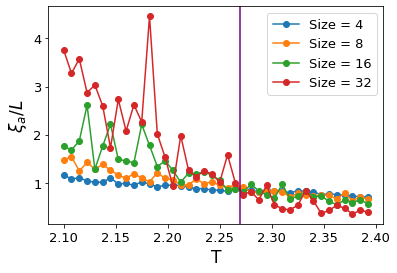

In [12]:
Tc_exact = 2/(np.log(1+2**(1/2)))
plt.plot(T_xi_list, Xi_4_list, 'o-', markersize = 6, label = 'Size = 4')
plt.plot(T_xi_list, Xi_8_list, 'o-', markersize = 6, label = 'Size = 8')
plt.plot(T_xi_list, Xi_16_list, 'o-', markersize = 6, label = 'Size = 16')
plt.plot(T_xi_list, Xi_32_list, 'o-', markersize = 6, label = 'Size = 32')
plt.axvline(x = Tc_exact, color='purple')
plt.xlabel('T', fontsize = 17)
plt.ylabel(r'$\xi_a/L$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()